In [1]:
! aws s3 ls ga-et-data/inputsv0/air_temperature/ | grep tavg_001

2020-02-26 05:05:00         83 tavg_001.tfw
2020-02-26 05:05:00   13167138 tavg_001.tif
2020-02-26 05:05:00        624 tavg_001.tif.aux.xml
2020-02-26 05:05:00    2299911 tavg_001.tif.ovr
2020-02-26 05:05:01          5 tavg_001.tif.vat.cpg
2020-02-26 05:05:00       2588 tavg_001.tif.vat.dbf


In [2]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [3]:
! rio --help


Usage: rio [OPTIONS] COMMAND [ARGS]...

  Rasterio command line interface.

Options:
  -v, --verbose           Increase verbosity.
  -q, --quiet             Decrease verbosity.
  --aws-profile TEXT      Select a profile from the AWS credentials file
  --aws-no-sign-requests  Make requests anonymously
  --aws-requester-pays    Requester pays data transfer costs
  --version               Show the version and exit.
  --gdal-version
  --help                  Show this message and exit.

Commands:
  blocks     Write dataset blocks as GeoJSON features.
  bounds     Write bounding boxes to stdout as GeoJSON.
  calc       Raster data calculator.
  clip       Clip a raster to given bounds.
  convert    Copy and convert raster dataset.
  edit-info  Edit dataset metadata.
  env        Print information about the Rasterio environment.
  gcps       Print ground control points as GeoJSON.
  info       Print information about a data file.
  insp       Open a data file and start an interpreter.
  mask

In [4]:
! rio info /vsis3/ga-et-data/inputsv0/air_temperature/tavg_001.tif --indent 2

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    -175.000800499324,
    14.992882091954812,
    -14.992882091954726,
    90.00220831593491
  ],
  "colorinterp": [
    "gray"
  ],
  "compress": "lzw",
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "int32",
  "height": 8350,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    -94.99684129563936,
    52.49754520394486
  ],
  "mask_flags": [
    [
      "nodata"
    ]
  ],
  "nodata": -2147483648.0,
  "res": [
    0.00898315284119522,
    0.00898315284119522
  ],
  "shape": [
    8350,
    17812
  ],
  "tiled": true,
  "transform": [
    0.00898315284119522,
    0.0,
    -175.000800499324,
    0.0,
    -0.00898315284119522,
    90.00220831593491,
    0.0,
    0.0,
    1.0
  ],
  "units": [
    null
  ],
  "width": 17812
}


In [5]:
import xarray
my_tif = '/vsis3/ga-et-data/inputsv0/air_temperature/tavg_001.tif'
my_at_xarray = xarray.open_rasterio(my_tif)

In [6]:
my_at_xarray

<xarray.DataArray (band: 1, y: 8350, x: 17812)>
[148730200 values with dtype=int32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 90.0 89.99 89.98 89.97 89.96 ... 15.02 15.02 15.01 15.0
  * x        (x) float64 -175.0 -175.0 -175.0 -175.0 ... -15.02 -15.01 -15.0
Attributes:
    transform:      (0.00898315284119522, 0.0, -175.000800499324, 0.0, -0.008...
    crs:            +init=epsg:4326
    res:            (0.00898315284119522, 0.00898315284119522)
    is_tiled:       1
    nodatavals:     (-2147483648.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

In [7]:
# da = da.squeeze().drop(labels='band')
my_at_xarray = my_at_xarray.squeeze().drop(labels='band')
my_at_xarray

<xarray.DataArray (y: 8350, x: 17812)>
[148730200 values with dtype=int32]
Coordinates:
  * y        (y) float64 90.0 89.99 89.98 89.97 89.96 ... 15.02 15.02 15.01 15.0
  * x        (x) float64 -175.0 -175.0 -175.0 -175.0 ... -15.02 -15.01 -15.0
Attributes:
    transform:      (0.00898315284119522, 0.0, -175.000800499324, 0.0, -0.008...
    crs:            +init=epsg:4326
    res:            (0.00898315284119522, 0.00898315284119522)
    is_tiled:       1
    nodatavals:     (-2147483648.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

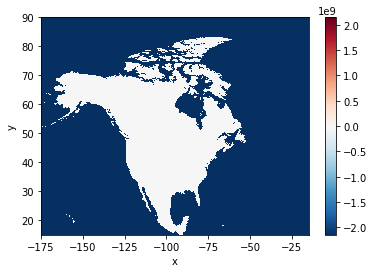

In [8]:
#ds[display_color].plot.imshow('x', 'y', col='datePR', col_wrap=4, cmap='prism')
my_at_xarray.plot.imshow('x','y')

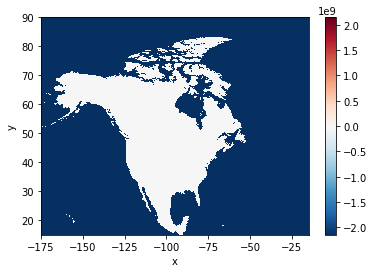

In [9]:
my_at_xarray.plot.imshow()

# The above is graphs are typical and not useful

## The fix is to handle the nodata values


In [13]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

In [14]:
# dir(my_at_xarray)

In [15]:
#normalize(my_at_xarray)

In [16]:
array = my_at_xarray.values

In [17]:
array

array([[-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       ...,
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648]], dtype=int32)

In [18]:
array.min()

-2147483648

In [19]:
array.max()

323

In [21]:
import numpy as np
#array[(array < 0) | (array > 400)] = np.nan
# ValueError: cannot convert float NaN to integer   ## Investigate perhaps
# array[(array < 0)] = np.nan
array[(array < 0)] = 0

In [22]:
array.min()

0

In [23]:
array.max()


323

In [24]:
my_at_xarray

<xarray.DataArray (y: 8350, x: 17812)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * y        (y) float64 90.0 89.99 89.98 89.97 89.96 ... 15.02 15.02 15.01 15.0
  * x        (x) float64 -175.0 -175.0 -175.0 -175.0 ... -15.02 -15.01 -15.0
Attributes:
    transform:      (0.00898315284119522, 0.0, -175.000800499324, 0.0, -0.008...
    crs:            +init=epsg:4326
    res:            (0.00898315284119522, 0.00898315284119522)
    is_tiled:       1
    nodatavals:     (-2147483648.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    DataType:       Generic

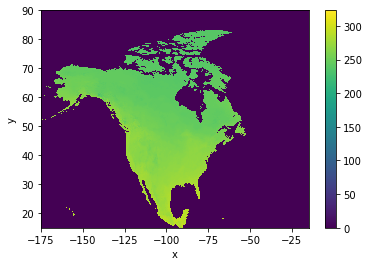

In [25]:
my_at_xarray.plot.imshow()

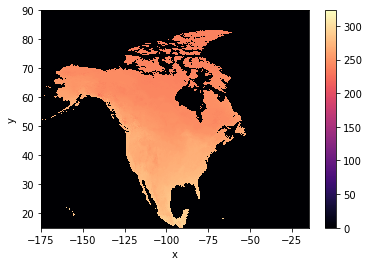

In [26]:
my_at_xarray.plot.imshow(cmap='magma')

# The above plots are better some contrast

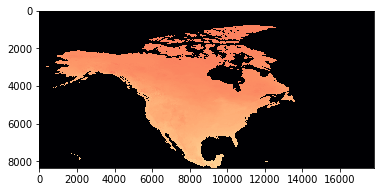

In [27]:
import matplotlib.pyplot as plt

plt.imshow(array, vmin = np.nanmin(array), vmax = np.nanmax(array), cmap = 'magma');

# Cut the middle 1024 by 1024 out of the array

## too big for histogram - blows up jupyter

In [28]:
array.shape
row = int(array.shape[0]/2)
row
col = int(array.shape[1]/2)
col

row,col

sz = 1024



b = array[row:row+sz,col:col+sz]

In [29]:
from rasterio.plot import show_hist
#show_hist(array, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [30]:
b.shape

(1024, 1024)

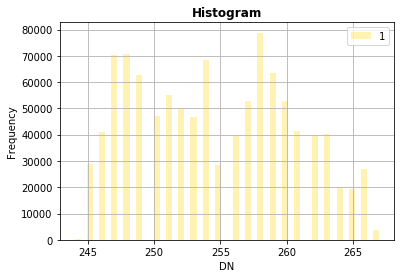

In [31]:
show_hist(b, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

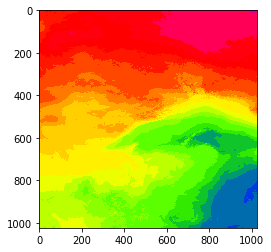

In [32]:
plt.imshow(b, vmin = np.nanmin(array), vmax = np.nanmax(array), cmap = 'prism');

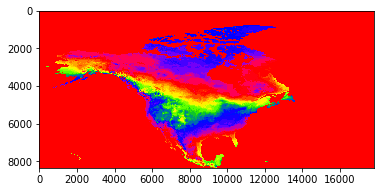

In [33]:
plt.imshow(array, vmin = np.nanmin(array), vmax = np.nanmax(array), cmap = 'prism');

# Good enough - we can at least see the data has a distinct value range